Finding the correlation between different aspects of movies such as gross revenue, genre, production companyy, year released etc.

In [47]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) #Adjusts the configeration of the plots


In [48]:
# Read and view the data

df = pd.read_csv(r'/Users/tasfi/Desktop/excel/movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [49]:
# Drop rows with missing values in any column
df = df.dropna()

# # Check the new DataFrame's shape and head to confirm
# print(f"Original DataFrame shape: {df.shape}")
# print(f"Cleaned DataFrame shape: {df_cleaned.shape}")
# print(df_cleaned.head())


In [50]:
# look for amount of missing data (should be 0% after dropping the rows with null values)

for cl in df.columns:
    data_missing = np.mean(df[cl].isnull())
    print('{} - {}%'.format(cl, data_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [51]:
missing_count = df['budget'].isna().sum()
print(f"Number of missing rows in the 'budget' column: {missing_count}")


Number of missing rows in the 'budget' column: 0


In [52]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [53]:
# change datatype from floats to int for readability
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [54]:
# the year column contains wrong values in some rows
# create a new year column with correct values

df['year_correct'] = df['released'].str.extract(r', (\d{4})')


In [55]:
df.sort_values(by=['gross'], inplace = False, ascending= False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


In [56]:
# shift the year_Ccorrect column next to the year column to compare

cols = list(df.columns)
cols.remove('year_correct')
year_index = cols.index('year')
cols.insert(year_index + 1, 'year_correct')
df = df[cols]
df.head()

,name,rating,genre,year,year_correct,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [57]:
# sort movies from highest grossing to lowest

df.sort_values(by=['gross'], inplace = False, ascending= False)
df.head()

,name,rating,genre,year,year_correct,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [58]:
# find all the production companies

df['company'].drop_duplicates()


0                              Warner Bros.
1                         Columbia Pictures
2                                 Lucasfilm
3                        Paramount Pictures
4                            Orion Pictures
                       ...                 
7604                         Emphatic Films
7616                 Hicktown Entertainment
7645                Clubhouse Pictures (II)
7651                   20th Century Studios
7652    Beijing Diqi Yinxiang Entertainment
Name: company, Length: 1475, dtype: object

In [59]:
# hypothesis: company and budget will have the highest correlation to gross income

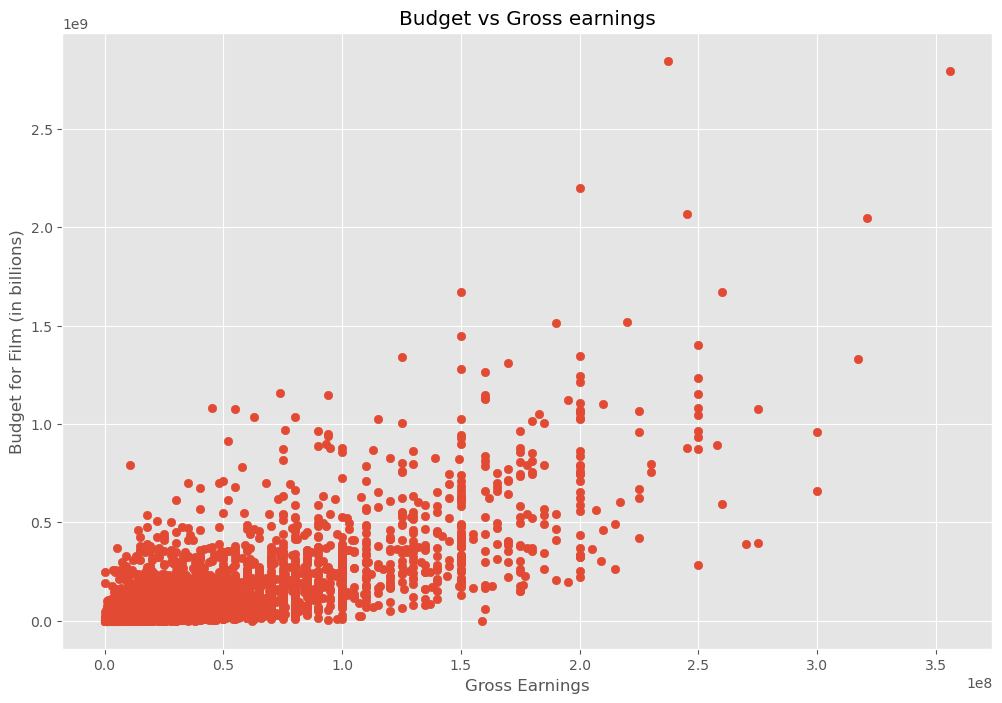

In [60]:
# scatterplot to find correlation

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film (in billions)')
plt.show()

In [61]:
# df.sort_values(by=['gross'], inplace=False, ascending=False)


<Axes: xlabel='budget', ylabel='gross'>

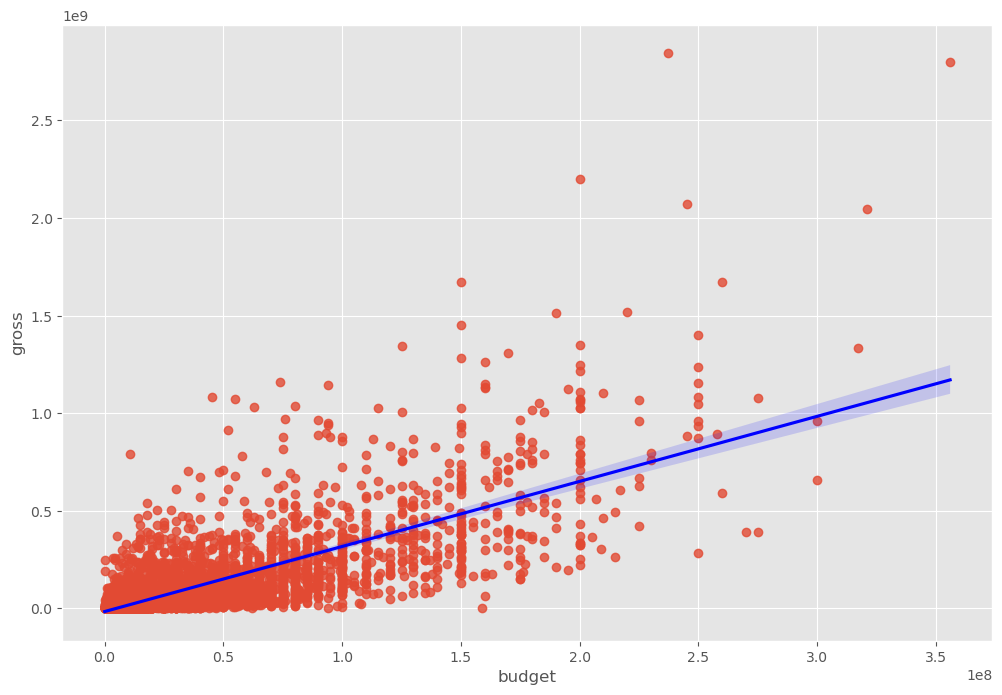

In [62]:
# plot budget vs Gross using seaborn

sns.regplot(x='budget', y='gross', data= df, line_kws={'color': 'blue'})

In [63]:
# correlation table

numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


             year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000


There is a high correlation between budget and gross revenue as expected

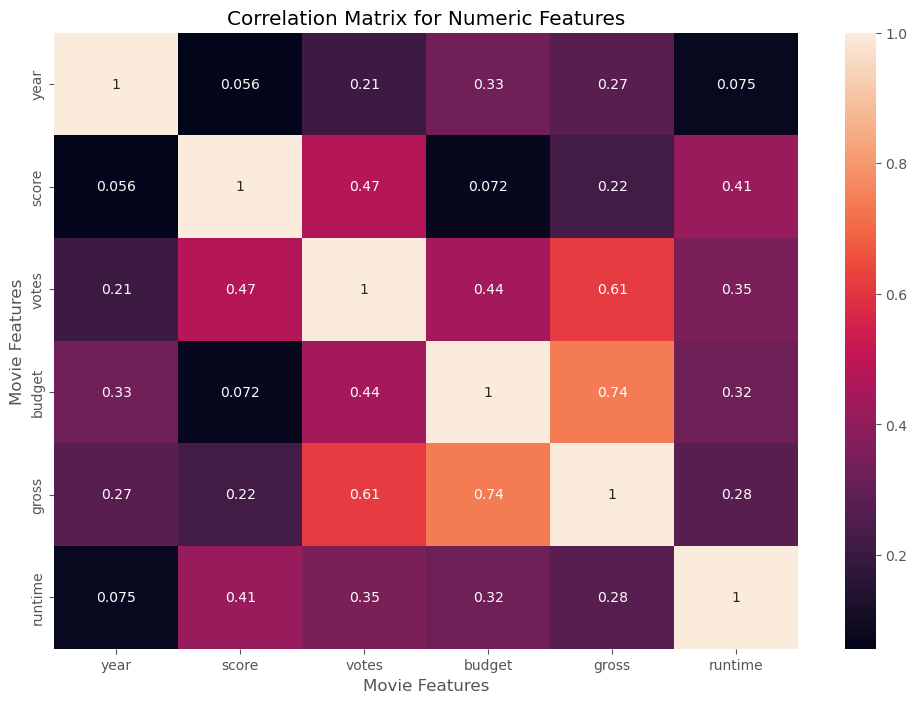

In [64]:
# create a heatmap of the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [65]:
# assign numeric values to object columns 
df_object = df.copy()


object_columns = df.select_dtypes(include=['object']).columns

for col in object_columns:
    df_object[col] = df_object[col].astype('category').cat.codes

df_object

,name,rating,genre,year,year_correct,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,0,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0
1,3929,6,1,1980,0,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0
2,3641,4,0,1980,0,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0
3,204,4,4,1980,0,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0
4,732,6,4,1980,0,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,40,904,6.6,140000.0,16,2390,1812,47,90000000,426505244,452,124.0
7649,3556,4,0,2020,40,713,6.5,102000.0,852,2309,147,47,85000000,319715683,1108,99.0
7650,1153,4,1,2020,40,904,5.6,53000.0,1809,2827,1470,47,175000000,245487753,1397,101.0
7651,3978,4,1,2020,40,758,6.8,42000.0,294,2091,640,6,135000000,111105497,12,100.0


In [66]:
df.head()

,name,rating,genre,year,year_correct,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


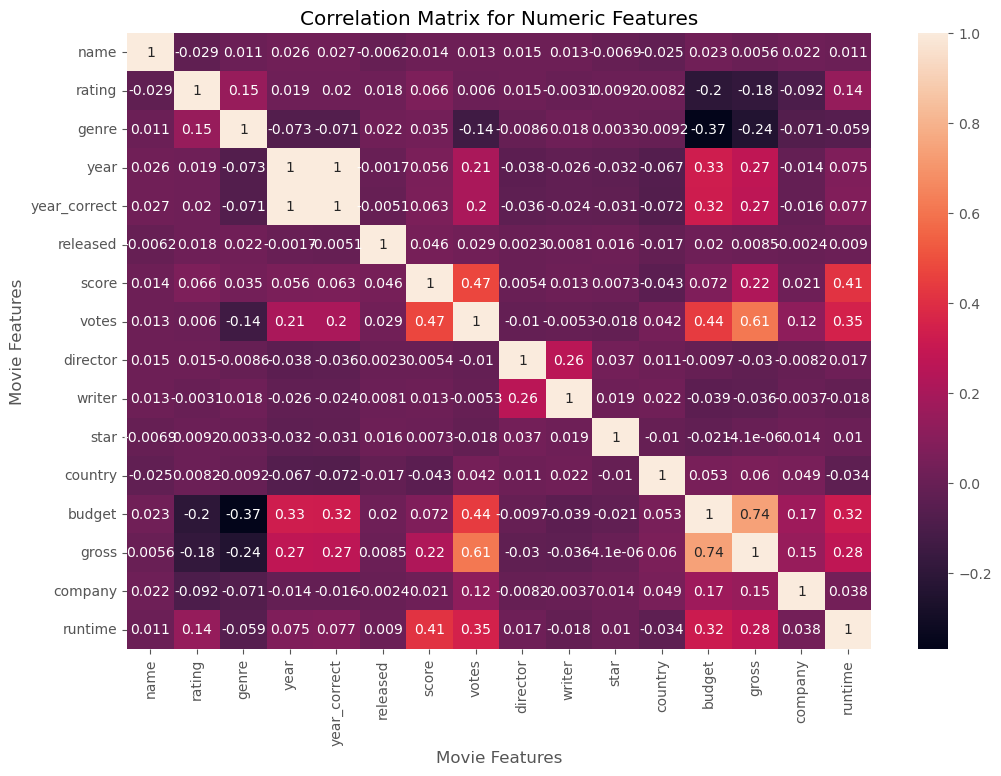

In [67]:
# create a heatmap of the correlation matrix including objects
correlation_matrix = df_object.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()


In [68]:
df_object.corr()

,name,rating,genre,year,year_correct,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.029234,0.010996,0.025542,0.026759,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850
rating,-0.029234,1.000000,0.147796,0.019499,0.019560,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792
genre,0.010996,0.147796,1.000000,-0.073167,-0.070699,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237
year,0.025542,0.019499,-0.073167,1.000000,0.996723,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077
year_correct,0.026759,0.019560,-0.070699,0.996723,1.000000,-0.005141,0.062648,0.204183,-0.035738,-0.023603,-0.030840,-0.072407,0.321624,0.269479,-0.015587,0.076666
released,-0.006152,0.018083,0.022142,-0.001740,-0.005141,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975
score,0.014450,0.065983,0.035106,0.056386,0.062648,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068
votes,0.012615,0.006031,-0.135990,0.206021,0.204183,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303
director,0.015246,0.014656,-0.008553,-0.038354,-0.035738,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433
writer,0.012880,-0.003149,0.017578,-0.025908,-0.023603,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561


In [73]:
# view correlation in stack format
correlation_mat = df_object.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name          name            1.000000
              rating         -0.029234
              genre           0.010996
              year            0.025542
              year_correct    0.026759
              released       -0.006152
              score           0.014450
              votes           0.012615
              director        0.015246
              writer          0.012880
              star           -0.006882
              country        -0.025490
              budget          0.023392
              gross           0.005639
              company         0.021697
              runtime         0.010850
rating        name           -0.029234
              rating          1.000000
              genre           0.147796
              year            0.019499
              year_correct    0.019560
              released        0.018083
              score           0.065983
              votes           0.006031
              director        0.014656
              writer     

In [74]:
sorted_pairs = cor_pairs.sort_values()
sorted_pairs

budget        genre          -0.368523
genre         budget         -0.368523
              gross          -0.244101
gross         genre          -0.244101
budget        rating         -0.203946
rating        budget         -0.203946
              gross          -0.181906
gross         rating         -0.181906
genre         votes          -0.135990
votes         genre          -0.135990
rating        company        -0.092357
company       rating         -0.092357
genre         year           -0.073167
year          genre          -0.073167
year_correct  country        -0.072407
country       year_correct   -0.072407
genre         company        -0.071334
company       genre          -0.071334
year_correct  genre          -0.070699
genre         year_correct   -0.070699
country       year           -0.066748
year          country        -0.066748
genre         runtime        -0.059237
runtime       genre          -0.059237
country       score          -0.043051
score         country    

In [75]:
high_correlation = sorted_pairs[(sorted_pairs) > .5]
high_correlation

gross         votes           0.614751
votes         gross           0.614751
budget        gross           0.740247
gross         budget          0.740247
year_correct  year            0.996723
year          year_correct    0.996723
name          name            1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year_correct  year_correct    1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
company       company         1.000000
runtime       runtime         1.000000
dtype: float64

Company has no correlation to high grossing movies.
The biggest factors are budget and votes.